# Usage of FinanceDataReader

-----------

import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import pandas as pd
import time

----------

## Download stock data for the selected firms

In [2]:
tickers= ['UBER', 'LYFT', 'CROX']
start_date= "2020-01-01"
end_date= "2021-08-31"

In [3]:
# Collecting stock data of selected tickers

df= pd.DataFrame() # empty holder

print("Start date: ", start_date)
print("End date: ", end_date)
print("="*20)
for symbol in tickers:
    try:
        df_one=fdr.DataReader(symbol, start_date, end_date)
        df_one.reset_index(inplace=True)
        df_one['Ticker']=symbol
        time.sleep(1)
        df= pd.concat([df, df_one])
        print("{} is collected.".format(symbol))
        
    except:
        print("{} does not exist.".format(symbol))
        pass

Start date:  2020-01-01
End date:  2021-08-31
UBER is collected.
LYFT is collected.
CROX is collected.


In [4]:
df.groupby('Ticker').head(2)

,Date,Close,Open,High,Low,Volume,Change,Ticker
0,2020-01-02,30.99,29.94,31.00,29.79,20580000.0,0.0420,UBER
1,2020-01-03,31.37,30.62,31.43,30.48,18830000.0,0.0123,UBER
0,2020-01-02,43.58,43.22,44.07,43.17,3910000.0,0.0130,LYFT
1,2020-01-03,43.19,42.85,43.36,42.23,4410000.0,-0.0089,LYFT
0,2020-01-02,41.75,42.23,42.23,41.26,1020000.0,-0.0033,CROX
1,2020-01-03,42.08,41.31,42.14,41.16,662840.0,0.0079,CROX


In [5]:
df['Ticker'].value_counts()

UBER    420
LYFT    420
CROX    420
Name: Ticker, dtype: int64

----------

## Get the list of stocks

### S&P500 list

In [6]:
SP500=fdr.StockListing('S&P500')
SP500.head()

C:\Users\yjaey\anaconda3\lib\site-packages\FinanceDataReader\wikipedia\listing.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Symbol'] = df['Symbol'].str.replace('\.', '')


,Symbol,Name,Sector,Industry
0,MMM,3M,Industrials,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment
3,ABBV,AbbVie,Health Care,Pharmaceuticals
4,ABMD,Abiomed,Health Care,Health Care Equipment


In [7]:
Sector=SP500['Sector'].value_counts()
Industry=SP500['Industry'].value_counts()

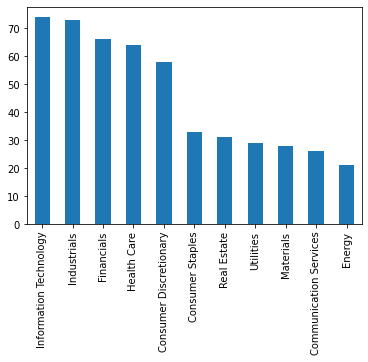

In [8]:
plt.xticks(rotation=90)
Sector.plot(kind='bar')
plt.show()

### NYSE list

In [15]:
NYSE=fdr.StockListing('NYSE')
NYSE.head()

100%|██████████████████████████████████████████████████████████████████████████████| 3401/3401 [00:37<00:00, 90.51it/s]


,Symbol,Name,Industry,IndustryCode
0,UNH,UnitedHealth Group Inc,헬스케어 업체 및 서비스,561020
1,TSM,Taiwan Semiconductor Manufacturing Co Ltd ADR,반도체 및 반도체 장비,571010
2,V,Visa Inc Class A,소프트웨어 및 IT서비스,572010
3,JNJ,Johnson & Johnson,제약,562010
4,BRK.B,Berkshire Hathaway Inc Class B,복합 기업,544010


### NASDAQ list

In [18]:
NASDAQ=fdr.StockListing('NASDAQ')
NASDAQ.head()

100%|██████████████████████████████████████████████████████████████████████████████| 4626/4626 [00:53<00:00, 86.97it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,TSLA,Tesla Inc,자동차 및 자동차 부품,531010
4,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010


---------------